# EGRMGMT 590.10 Homework 4

*Due at 6:15pm ET on Thursday, March 21*

## Instructions

+ There are 9 exercises in total. Exercise 1 through 3 require coding. Your grades are based on the accuracy of the results, not the code execution speed.
  + Exercise 1: 1 point.
  + Exercise 2 and 3: each is worth 3 points. 
  + Exercise 4 to 9: each is worth 0.5 points. 
+ Exercise 1 through 3 require generating model parameters using code you built **from scratch** without relying on existing modules with functions or capabilities to "plug-in and populate" parameters for those models.
+ As the coding exercises require matrix manipulation, familiarize yourself with the following functions and methods:
  + numpy.linalg.inv
  + numpy.ndarray.dot
  + numpy.dot
  + numpy.ndarray.T   
+ Exercises are independent with each other. Feel free to work on them in the order you prefer.
+ Submit the .ipynb file to Sakai before 6:15pm ET on Thursday, March 21.
+ Assignments handed in late will lose 1 point every 24-hour window after 6:15pm ET on Thursday, March 21.

## Dataset

**Dataset Information:**

We'll be working on three datasets attached to Assignment 4 on Sakai. Each coding exercise requires a different dataset:
+ Exercise 1: 'Assignment4_SampleData_Ex1.csv'
+ Exercise 2: 'Assignment4_SampleData_Ex2.csv'
+ Exercise 3: 'Assignment4_SampleData_Ex3.csv'

## Exercises

### One-parameter Linaer Regression Modle

In [2]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import copy as copy
import os
import sys  as sys
import math as math
plt.rc('figure', figsize=(12, 8))

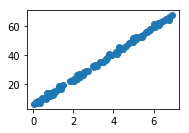

In [43]:
df1 = pd.read_csv('Dummy_data.csv')
theta = []
m = df1['X'].size
bias_vector = np.ones((m,1))
x_ary = np.array(df1['X'])
x_ary = np.reshape(x_ary, (m,1))
x_ary = np.append(x_ary, bias_vector, axis = 1)
X_transpose = np.transpose(x_ary)
# Calculating theta
theta = np.linalg.inv(X_transpose.dot(x_ary))
theta = theta.dot(X_transpose)
theta = theta.dot(df1['Y'])
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax1.scatter(df1.iloc[:,1] , df1.iloc[:, 0])

In [90]:
theta

array([8.93431811, 5.21509616])

### My slope = 8.93431811
### My intercept = 5.21509

In [92]:
from sklearn.linear_model import LinearRegression
df1_x = np.array(df1['X'])
reg = LinearRegression().fit(df1_x.reshape(-1,1), df1["Y"])
print(reg.coef_)
print(reg.intercept_)

[8.93431811]
5.215096157546743


### Sklearn's result is the same as mine


Building up two-variable Linear Regression Model

In [233]:
df2 = pd.read_csv('Dummy_data.csv')
Y = np.array(df2['Y'])
m = Y.size
X1 = np.array(df2['X1'])
X1 = X1.reshape(m,1)
X2 = np.array(df2['X2'])
X2 = X2.reshape(m,1)
X = np.append(X1, X2, axis = 1)
def calc_cost(theta, X, Y):
    cost = 0
    m = Y.size
    for i in range(m):
        cost_i = ((np.transpose(theta)).dot(X[i]) - Y[i])**2
        cost = cost + cost_i
    cost = cost / m
    return cost

def BGD(X, Y, eta = 0.01, n_rounds = 10000, tol = 10**(-10), random_state = 42):
    times = 0
    cost_pre = sys.maxsize
    
    np.random.seed(random_state)
    m = X.shape[0]
    bias_vector = np.ones((m,1))
    X_apd = np.append(bias_vector, X, axis = 1)
    X_T = np.transpose(X_apd)
    theta = np.random.rand(X_apd.shape[1])
    while (times < n_rounds):
        grd_vector = (2/m) * X_T.dot(X_apd.dot(theta) - Y)
        theta = theta - eta * grd_vector
        cost_curr = calc_cost(theta, X_apd, Y)
        if (abs(cost_pre - cost_curr) < tol):
            break
        cost_pre = cost_curr
        times = times + 1
    return theta
    """
    Returns the intercept and predictor coefficients for a multiple linear regression model using Batch Gradient Descent 
    with MSE as the cost function.
    
    Parameters
    ----------
    X: a numpy ndarray with the independent variables
    Y: a numpy ndarray with the dependent variable
    eta: the learning rate, e.g. 0.1, 0.01, 0.001 etc.
    n_rounds: number of passes over the data, e.g. 100, 1000, 10000 etc.
    tol: the stopping criteria, i.e. previous MSE - current MSE < tol
    random_state: a random state to make the randomness deterministic
    
    Examples
    ----------
    BGD(X, Y)
    BGD(X, Y, eta = 0.01)
    
    Notes
    ----------
    The parameters are returned in a numpy ndarray.
    
    """
BGD(X, Y)


3


array([4.91025075, 5.82932544, 9.10279851])

In [185]:
reg1 = LinearRegression().fit(X, Y)
print("intercept = ", reg1.intercept_)
print("coeffient = ", reg1.coef_)

intercept =  4.910610036450052
coeffient =  [5.82913734 9.10275877]


### My result is close to the sklearn's result

### Building up a Logistic Regression Model

In [142]:
df3 = pd.read_csv('Assignment4_SampleData_Ex3.csv')
Y = np.array(df3['Y'])
m = Y.size
X1 = np.array(df3['X1']).reshape(m,1)
X2 = np.array(df3['X2']).reshape(m,1)
X3 = np.array(df3['X3']).reshape(m,1)
X_12 = np.append(X1, X2, axis = 1)
X = np.append(X_12, X3, axis = 1)
print(X.shape)
def calc_cost(theta, X, Y):
    cost = 0
    m = Y.size
    for i in range(m):
        omega = 1 / (1 + np.exp(-1 * (np.transpose(theta)).dot(X[i])))
        cost_i = Y[i]*math.log(omega) + (1-Y[i])*math.log(1-omega)
        cost = cost + cost_i
    cost = cost / m * -1
    return cost

def BGD_LogisticRegression(X, Y, eta = 0.001, n_rounds = 100000, tol = 10**(-10), random_state = 42):
    m = Y.size
    times = 0
    cost_pre = sys.maxsize
    
    bias_vector = np.ones((m,1))
    X_apd = np.append(X, bias_vector, axis = 1)
    theta = np.random.rand(X_apd.shape[1])
    while (times < n_rounds):
        g = 1 / (1 + np.exp(-1 * X_apd.dot(theta))) 
        grd_vector = 1 / m * (np.transpose(X_apd)).dot(g - Y)
        theta = theta - eta*grd_vector
        cost_curr = calc_cost(theta, X_apd, Y)
        if (abs(cost_pre - cost_curr) < tol):
            print("cost_curr = ", cost_curr)
            print("cost_pre = ", cost_pre)
            break    
        cost_pre = cost_curr
        times = times + 1
    return theta
    """
    Returns the intercept and predictor coefficients for a binary logistic regression model using Batch Gradient Descent 
    with the log loss as the cost function.
    
    Parameters
    ----------
    X: a numpy ndarray with the independent variables
    Y: a numpy ndarray with the dependent binary categorical variable
    eta: the learning rate, e.g. 0.1, 0.01, 0.001 etc.
    n_rounds: number of passes over the data, e.g. 100, 1000, 10000 etc. 
    tol: the stopping criteria, i.e. previous log loss - current log loss < tol
    random_state: a random state to make the randomness deterministic
    
    Examples
    ----------
    BGD_LogisticRegression(X, Y)
    BGD_LogisticRegression(X, Y, eta = 0.001)
    
    Notes
    ----------
    The parameters are returned in a numpy ndarray.
    
    """
BGD_LogisticRegression(X, Y)


(1000, 3)


array([0.7835683 , 3.00883649, 3.96489009, 2.49815872])

My theta is(0.7835683 , 3.00883649, 3.96489009)
My intercept is 2.49815872

In [183]:

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=42, solver='lbfgs', multi_class='multinomial').fit(X, Y)
sk_Y = clf.predict(X)
print(clf.score(X, Y))
print(clf.coef_)
print(clf.intercept_)
from sklearn.metrics import f1_score
print(f1_score(sk_Y, Y))

0.958
[[0.88944338 2.9908795  4.01841388]]
[2.38651297]
0.9732142857142857


In [184]:
def predict(x):
    q0 = 0.7835683
    q1 = 3.00883649
    q2 = 3.96489009
    q3 = 2.49815872
    
    x1 = x[1]
    x2 = x[2]
    x3 = x[3]

    p = 1 / (1 + np.exp(-1*(q3 + x1*q0 + x2*q1 + x3*q2)))
    return p > 0.5


In [187]:
prediction = []
result = []
TP = 0
TN = 0
FP = 0
FN = 0

for i in range(df3['Y'].size):
    prediction.append(predict(df3.iloc[i]))
    result.append(df3.iloc[i][0])
    if ((prediction[i] == 1) & (df3.iloc[i][0] == 1)) :
        TP = TP + 1
    elif ((prediction[i] == 1) & (df3.iloc[i][0] == 0)):
        FP = FP + 1
    elif ((prediction[i] == 0) & (df3.iloc[i][0] == 0)):
        TN = TN + 1
    else:
        FN = FN + 1
print("TN =" + str(TN) + ",FP = " + str(FP))
print("FN =" + str(FN) + ",TP = " + str(TP))
F1 = 2*TP / (2*TP + FP + FN)
print("F1 score = ", F1)
f1_score(prediction, Y)

#ax2 = fig.add_subplot(2,2,2)
#plt.scatter(prediction,result)
#plt.show()

1000
TN =189,FP = 31
FN =11,TP = 769
F1 score =  0.9734177215189873


0.9734177215189873

My F1 score is close to sklearn's F1 score, the difference is negligible